                business_id           name  \
0    8k62wYhDVq1-652YbJi5eg    Tim Hortons   
44   XglMkgLbu2U0wsbLTOQhxw    Tim Hortons   
32   5KHvSQ9D85ZfBiTXQig4bg    Tim Hortons   
33   tnE2pii5EM-9u6iAA1lPyw    Tim Hortons   
34   1FH0-rrgqziDLAw0pZD3QQ    Tim Hortons   
..                      ...            ...   
448  Tv1CcqD67_Bz9YJadLgMuw  Mucho Burrito   
449  fCpPsX76xgs4BKLe_uxAMQ  Mucho Burrito   
450  iQbvBT1PY1FQdxGUC30nZQ  Mucho Burrito   
451  Z8O-Svr6gE_Ie1HVy1I8DQ  Mucho Burrito   
550  Sy9XPnOgEr7PemrYPWB7yw   Fit For Life   

                                 address     city state postal_code  \
0                   90 Adelaide Street W  Toronto    ON     M5H 3V9   
44                    751 Don Mills Road  Toronto    ON     M3C 1S3   
32                 438 University Avenue  Toronto    ON     M5G 2K8   
33                         1910 Yonge St  Toronto    ON     M4S 3B2   
34                  5250 Dundas Street W  Toronto    ON     M9B 1A9   
..                   

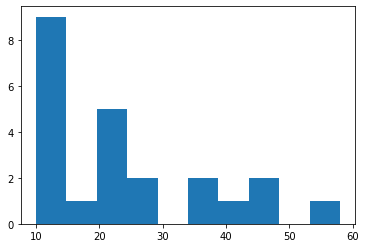

In [4]:
# Chain restaurants
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data/all_reviews_cleaned.csv', index_col=[0])

# filter: Subset the dataframe rows or columns according to the specified index labels.
count_name = df.filter(['name'])

# Get number of restaurants for each business
count_name = count_name.groupby(count_name['name']).size().reset_index(name='count')
count_name = count_name.sort_values(by=['count'], ascending = False)

# Number of locations to be a chain restaurant
removed_outliers = count_name['count'] >= 10
count_name = count_name[removed_outliers]

plt.hist(count_name['count'], bins=10)
# plt.show()
# print(count_name)

join = pd.merge(df, count_name, on = 'name')
join = join.sort_values(by=['count'], ascending = False)
print(join)

df.to_csv('Data/chain_restaurant_cleaned.csv', index = False)